In [334]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd



In [7]:
data = pd.read_csv("tripvn.csv")
data.head()

,Unnamed: 0,Test,Time,Mdn DNS (ms),Mdn SSL (ms),Avg Time To First Byte (ms),Mdn Webpage Response (ms),Mdn Render Start (ms),Avg Image Bytes,Avg Script Bytes,Avg Css Bytes,% Availability,# Runs
0,0,[204709] - trip.com,11/01/2017 0:00,287.5,NaN,584.58,9762.5,1048.0,750792.42,547889.58,10758.67,91.667,12
1,1,[204709] - trip.com,11/01/2017 2:00,254.5,NaN,904.00,8726.0,1049.0,674683.25,582856.67,10772.50,100.000,12
2,2,[204709] - trip.com,11/01/2017 4:00,228.0,NaN,419.91,9611.0,897.0,734774.91,578993.36,10761.00,100.000,11
3,3,[204709] - trip.com,11/01/2017 6:00,180.0,NaN,626.85,9992.0,1402.0,787461.77,584607.54,10760.77,100.000,13
4,4,[204709] - trip.com,11/01/2017 8:00,227.0,NaN,387.00,8654.0,1197.0,734543.82,579352.91,10764.73,100.000,11


# 1.Overview of Metrics


In [150]:
missing_data=data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')


Unnamed: 0
False    360
Name: Unnamed: 0, dtype: int64

Test
False    360
Name: Test, dtype: int64

Time
False    360
Name: Time, dtype: int64

Mdn DNS (ms)
False    360
Name: Mdn DNS (ms), dtype: int64

Mdn SSL (ms)
True    360
Name: Mdn SSL (ms), dtype: int64

Avg Time To First Byte (ms)
False    360
Name: Avg Time To First Byte (ms), dtype: int64

Mdn Webpage Response (ms)
False    360
Name: Mdn Webpage Response (ms), dtype: int64

Mdn Render Start (ms)
False    360
Name: Mdn Render Start (ms), dtype: int64

Avg Image Bytes
False    360
Name: Avg Image Bytes, dtype: int64

Avg Script Bytes
False    360
Name: Avg Script Bytes, dtype: int64

Avg Css Bytes
False    360
Name: Avg Css Bytes, dtype: int64

% Availability
False    360
Name: % Availability, dtype: int64

# Runs
False    360
Name: # Runs, dtype: int64



In [149]:
data.shape

(360, 13)

In [152]:
data.dtypes

Unnamed: 0                       int64
Test                            object
Time                            object
Mdn DNS (ms)                   float64
Mdn SSL (ms)                   float64
Avg Time To First Byte (ms)    float64
Mdn Webpage Response (ms)      float64
Mdn Render Start (ms)          float64
Avg Image Bytes                float64
Avg Script Bytes               float64
Avg Css Bytes                  float64
% Availability                 float64
# Runs                           int64
dtype: object

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   360 non-null    int64  
 1   Test                         360 non-null    object 
 2   Time                         360 non-null    object 
 3   Mdn DNS (ms)                 360 non-null    float64
 4   Mdn SSL (ms)                 0 non-null      float64
 5   Avg Time To First Byte (ms)  360 non-null    float64
 6   Mdn Webpage Response (ms)    360 non-null    float64
 7   Mdn Render Start (ms)        360 non-null    float64
 8   Avg Image Bytes              360 non-null    float64
 9   Avg Script Bytes             360 non-null    float64
 10  Avg Css Bytes                360 non-null    float64
 11  % Availability               360 non-null    float64
 12  # Runs                       360 non-null    int64  
dtypes: float64(9), int64

In [171]:
data['Time'] = pd.to_datetime(data['Time'])

In [172]:
data.head()

,Unnamed: 0,Test,Time,Mdn DNS (ms),Mdn SSL (ms),Avg Time To First Byte (ms),Mdn Webpage Response (ms),Mdn Render Start (ms),Avg Image Bytes,Avg Script Bytes,Avg Css Bytes,% Availability,# Runs
0,0,[204709] - trip.com,2017-11-01 00:00:00,287.5,NaN,584.58,9762.5,1048.0,750792.42,547889.58,10758.67,91.667,12
1,1,[204709] - trip.com,2017-11-01 02:00:00,254.5,NaN,904.00,8726.0,1049.0,674683.25,582856.67,10772.50,100.000,12
2,2,[204709] - trip.com,2017-11-01 04:00:00,228.0,NaN,419.91,9611.0,897.0,734774.91,578993.36,10761.00,100.000,11
3,3,[204709] - trip.com,2017-11-01 06:00:00,180.0,NaN,626.85,9992.0,1402.0,787461.77,584607.54,10760.77,100.000,13
4,4,[204709] - trip.com,2017-11-01 08:00:00,227.0,NaN,387.00,8654.0,1197.0,734543.82,579352.91,10764.73,100.000,11


In [303]:
data.describe().round(2)

,Unnamed: 0,Mdn DNS (ms),Mdn SSL (ms),Avg Time To First Byte (ms),Mdn Webpage Response (ms),Mdn Render Start (ms),Avg Image Bytes,Avg Script Bytes,Avg Css Bytes,% Availability,# Runs
count,360.00,360.00,360.0,360.00,360.00,360.00,360.00,360.00,360.00,360.00,360.00
mean,179.50,280.08,0.0,593.21,9593.34,1255.50,731153.38,573567.28,10767.40,95.26,11.96
std,104.07,70.51,0.0,286.77,1461.57,192.89,61567.94,19237.71,25.52,6.69,0.36
min,0.00,108.50,0.0,209.75,7535.50,807.00,566819.58,388817.40,10755.75,25.00,10.00
25%,89.75,232.88,0.0,401.75,8954.88,1099.00,693059.52,576244.87,10761.67,91.67,12.00
50%,179.50,274.75,0.0,484.17,9486.75,1247.50,731137.75,580734.76,10764.33,100.00,12.00
75%,269.25,323.00,0.0,710.35,9997.62,1384.25,771768.62,582433.52,10767.33,100.00,12.00
max,359.00,531.50,0.0,1957.58,30094.00,2194.50,908992.58,610802.17,11081.25,100.00,13.00


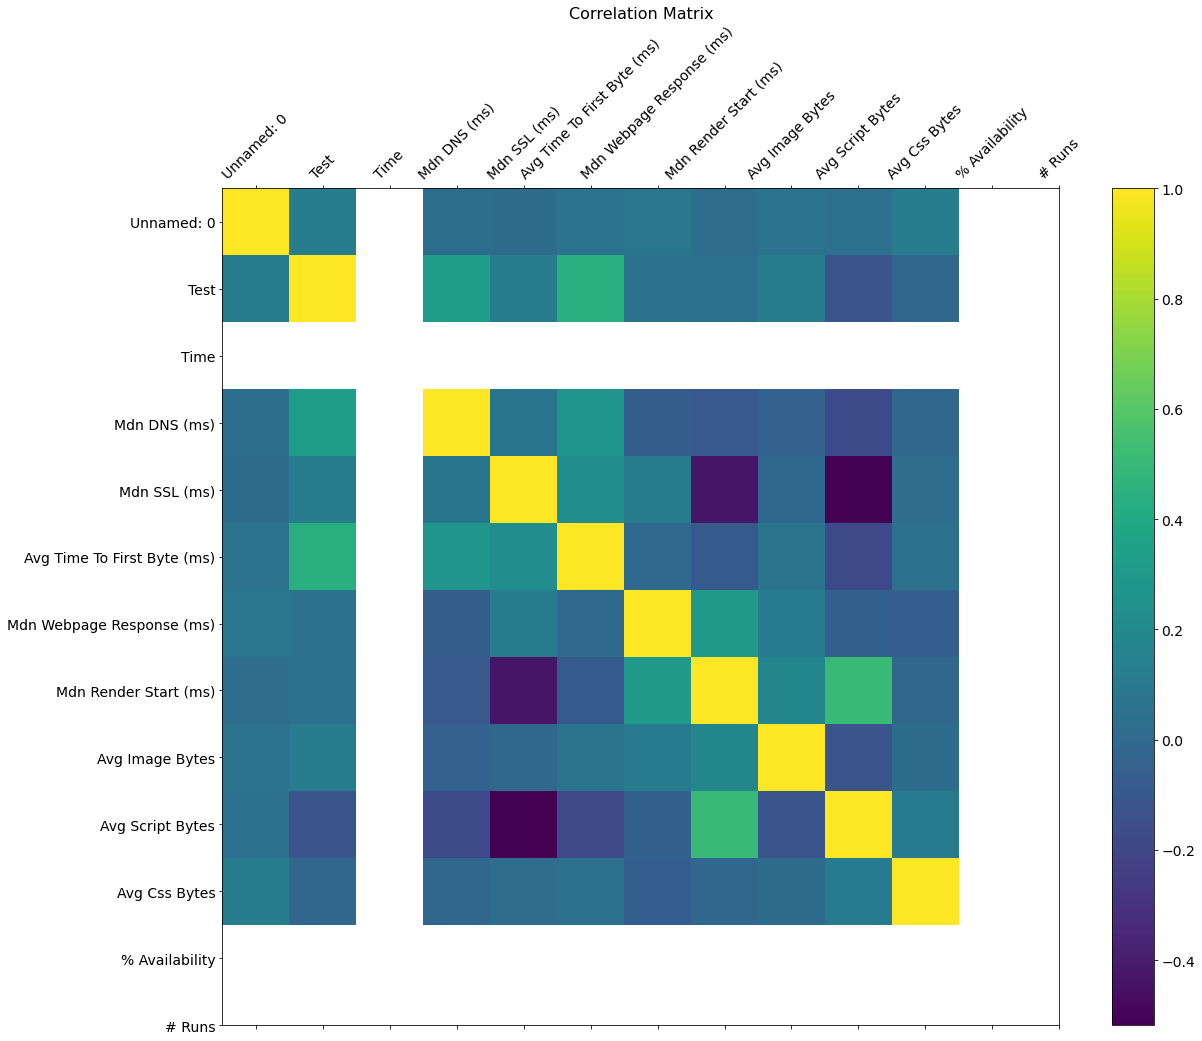

In [178]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14,rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Q2. Website Speed Metrics Analysis¶



I use: Mdn DNS (ms),Avg Time To First Byte (ms),Mdn Webpage Response (ms) ,Mdn Render Start (ms) to analyst


# Mdn DNS (ms)

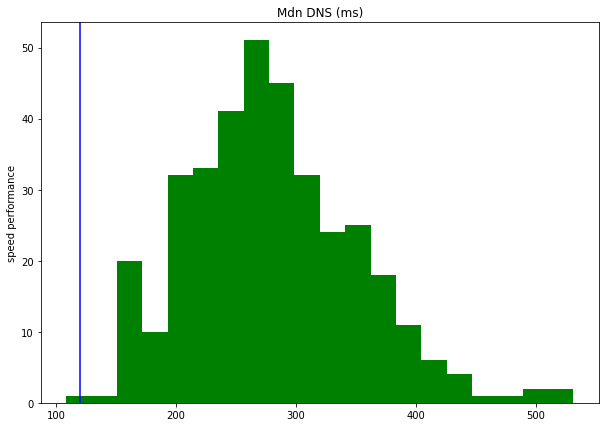

In [281]:
plt.figure(figsize = (10, 7))
x = data["Mdn DNS (ms)"]
plt.hist(x, bins = 20, color = "green") 
plt.title("Mdn DNS (ms)") 
plt.ylabel("speed performance") 
plt.axvline(x=120,color='blue')

# Avg Time To First Byte (ms)

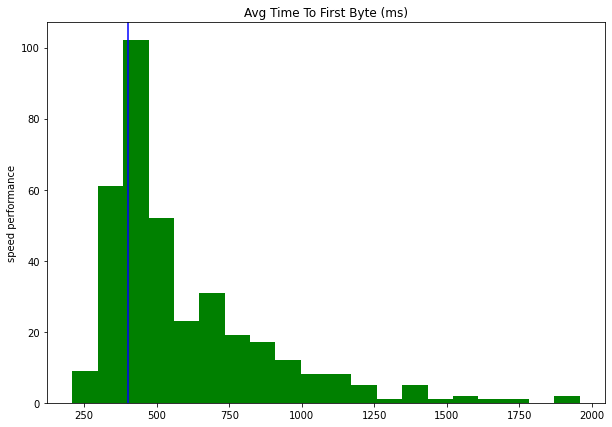

In [278]:
plt.figure(figsize = (10, 7))
x = data["Avg Time To First Byte (ms)"]   
plt.hist(x, bins = 20, color = "green") 
plt.title("Avg Time To First Byte (ms)") 
plt.ylabel("speed performance") 
plt.axvline(x=400,color='blue')

# Mdn Webpage Response (ms)

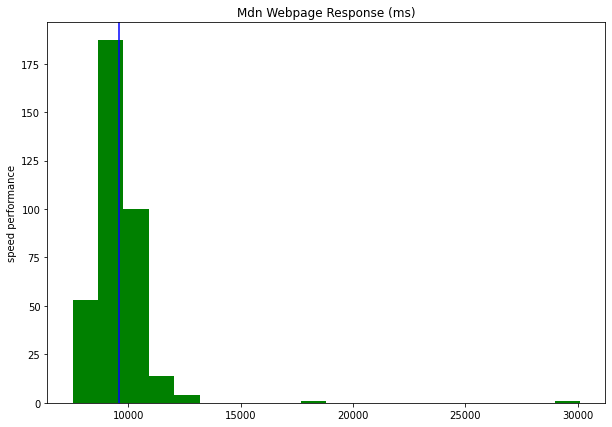

In [279]:
plt.figure(figsize = (10, 7))
x = data["Mdn Webpage Response (ms)"]   
plt.hist(x, bins = 20, color = "green") 
plt.title("Mdn Webpage Response (ms)") 
plt.ylabel("speed performance") 
plt.axvline(x=9593,color='blue')

# Mdn Render Start (ms)

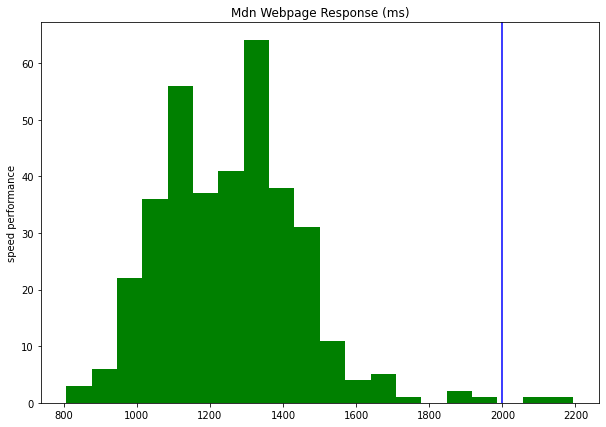

In [280]:
plt.figure(figsize = (10, 7))
x = data["Mdn Render Start (ms)"]   
plt.hist(x, bins = 20, color = "green") 
plt.title("Mdn Webpage Response (ms)") 
plt.ylabel("speed performance") 
plt.axvline(x=2000,color='blue')

# Q3. Website Content Analysis


/home/long/anaconda3/envs/data/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


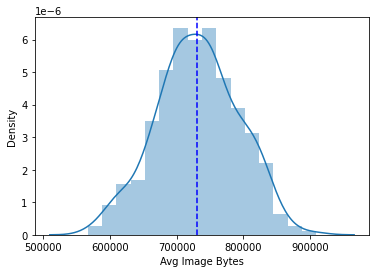

In [260]:


Image = data['Avg Image Bytes']
sns.distplot(Image);
plt.axvline(np.median(Image),color='b', linestyle='--')





/home/long/anaconda3/envs/data/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


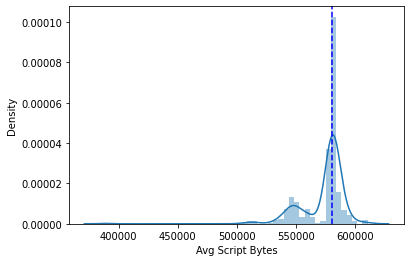

In [261]:
Script = data['Avg Script Bytes']
sns.distplot(Script);
plt.axvline(np.median(Script),color='b', linestyle='--')

/home/long/anaconda3/envs/data/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


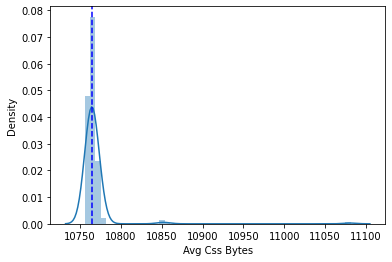

In [262]:
Css = data['Avg Css Bytes']
sns.distplot(Css);
plt.axvline(np.median(Css),color='b', linestyle='--')

a=data['Avg Image Bytes'].mean()
b = data['Avg Script Bytes'].mean()
c = data['Avg Css Bytes'].mean()
metrics = (a,b,c)


In [275]:
sum(metrics)


1315488.0595

1315488.0595 bytes = 1315.49KB
The size of traveloka.com is 878.1KB. So to make this website faster and has more traffics to ascess on time, I think we should decrase the quality of pictures or advertise and content of pages.


# Q4. Website Availability¶


In [344]:
df1 = pd.DataFrame()
df1['% Availability'] = data['% Availability']
df1['Mdn Webpage Response (ms)'] = data['Mdn Webpage Response (ms)']
df1['Avg Script Bytes'] = data['Avg Script Bytes']

In [345]:
df1.describe()

,% Availability,Mdn Webpage Response (ms),Avg Script Bytes
count,360.000000,360.000000,360.000000
mean,95.262775,9593.341667,573567.277056
std,6.689858,1461.569220,19237.706558
min,25.000000,7535.500000,388817.400000
25%,91.667000,8954.875000,576244.872500
50%,100.000000,9486.750000,580734.760000
75%,100.000000,9997.625000,582433.522500
max,100.000000,30094.000000,610802.170000


<AxesSubplot:>

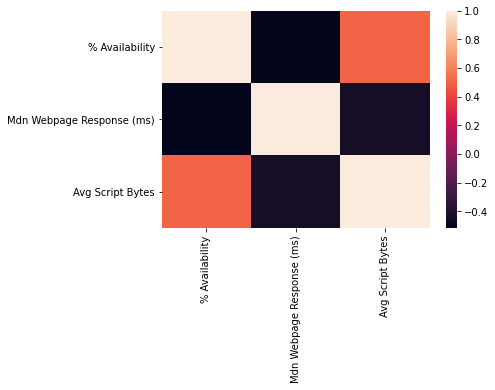

In [347]:
df1table = df1.corr().round(3)
sns.heatmap(df1table)

Text(0.5, 0, 'ms')

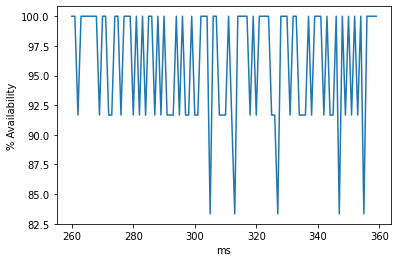

In [349]:
plt.plot(data["% Availability"].tail(100) )
plt.ylabel('% Availability')
plt.xlabel('ms')


Text(0.5, 0, 'ms')

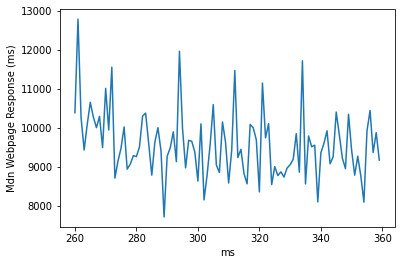

In [348]:
plt.plot(data["Mdn Webpage Response (ms)"] .tail(100))
plt.ylabel('Mdn Webpage Response (ms)')
plt.xlabel('ms')


